# 자전거 사고다발지역정보
데이터 링크 : https://taas.koroad.or.kr/api/selectBicycleDataSet.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [5]:
data = pd.read_csv('./자전거사고 다발지역.csv',encoding='cp949')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  4357 non-null   int64  
 1   사고다발지ID   4357 non-null   int64  
 2   법정동코드     4357 non-null   int64  
 3   지점코드      4357 non-null   int64  
 4   시도시군구명    4357 non-null   object 
 5   지점명       4357 non-null   object 
 6   발생건수      4357 non-null   int64  
 7   사상자수      4357 non-null   int64  
 8   사망자수      4357 non-null   int64  
 9   중상자수      4357 non-null   int64  
 10  경상자수      4357 non-null   int64  
 11  부상신고자수    4357 non-null   int64  
 12  경도        4357 non-null   float64
 13  위도        4357 non-null   float64
 14  다발지역폴리곤   4357 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 510.7+ KB


In [7]:
data.isnull().sum()

사고다발지FID    0
사고다발지ID     0
법정동코드       0
지점코드        0
시도시군구명      0
지점명         0
발생건수        0
사상자수        0
사망자수        0
중상자수        0
경상자수        0
부상신고자수      0
경도          0
위도          0
다발지역폴리곤     0
dtype: int64

In [8]:
data.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,161307,2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.99,37.58,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,153927,2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.98,37.57,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,153929,2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.02,37.57,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,139637,2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.02,37.57,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,153931,2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.96,37.52,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [61]:
def preprocessing(dataframe):
  df = dataframe.copy()
  code = pd.read_excel('./자전거사고 다발지역 코드.xlsx')

  code_dict = {}
  for i in range(38,48):
    code_dict[code.iloc[i,2]] =  code.iloc[i,1]

  df['년도'] = df['사고다발지ID'].map(lambda x: int('20' + code_dict[x][:2]))

  df['시도'] = df['지점명'].map(lambda x: x.split('(')[0].split(' ')[0])
  df['시군구'] = df['지점명'].map(lambda x: x.split('(')[0].split(' ')[0] + ' ' +  x.split('(')[0].split(' ')[1])
  df['동'] = df['지점명'].map(lambda x: x.split('(')[0].split(' ')[2])

  df = df.drop(['다발지역폴리곤','사고다발지FID','사고다발지ID','법정동코드','지점코드','시도시군구명'],axis=1)

  return df

bike = preprocessing(data)

In [62]:
bike.head()

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,년도,시도,시군구,동
0,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.99,37.58,2012,서울특별시,서울특별시 종로구,경운동
1,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.98,37.57,2012,서울특별시,서울특별시 종로구,서린동
2,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.02,37.57,2012,서울특별시,서울특별시 종로구,숭인동
3,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.02,37.57,2012,서울특별시,서울특별시 중구,흥인동
4,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.96,37.52,2012,서울특별시,서울특별시 용산구,한강로3가


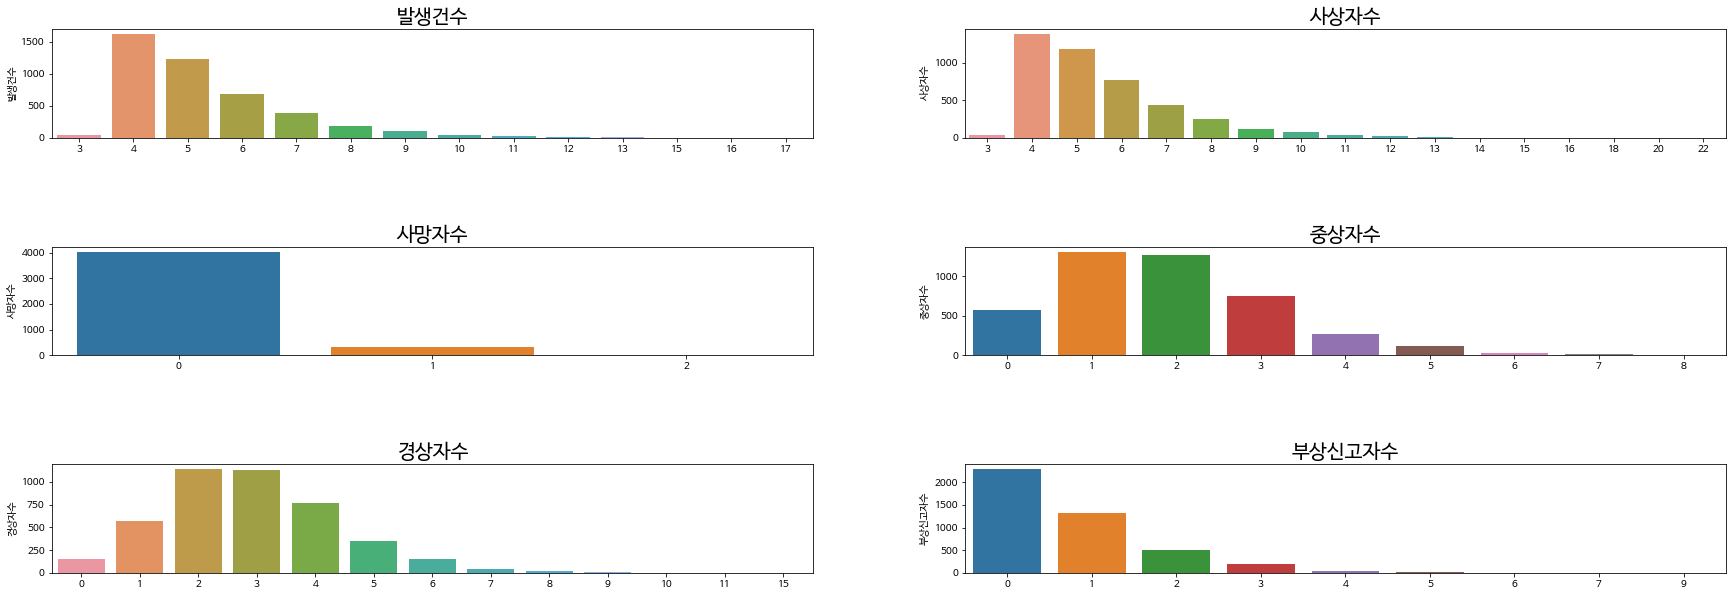

In [104]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)

for i in range(6):
  plt.subplot(3,2,i+1)
  sns.barplot(x = bike.iloc[:,1+i].value_counts().index , y = bike.iloc[:,1+i].value_counts())
  plt.title(bike.columns[1+i],size=20)
  
plt.show()

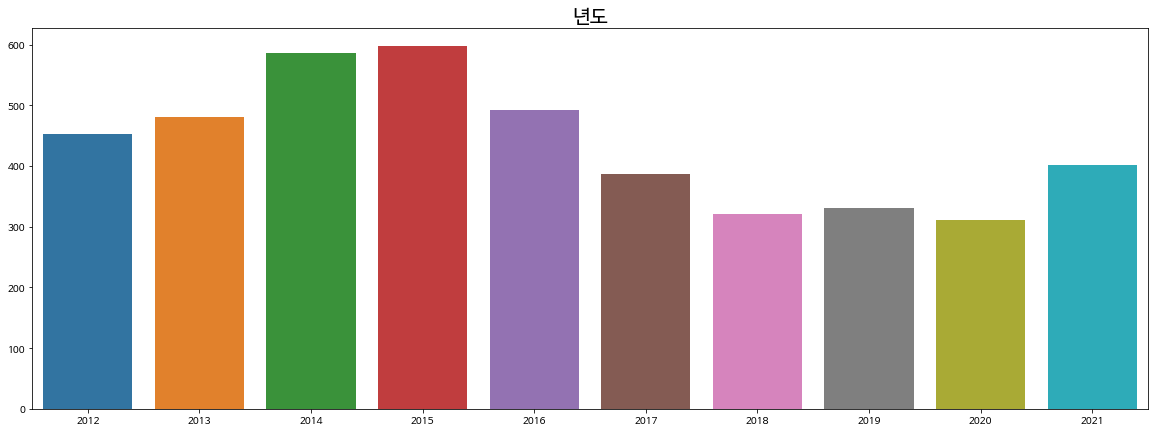

In [63]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)

sns.countplot(bike['년도'])
plt.title('년도',size=20)
plt.xlabel('')
plt.ylabel('')
plt.show()


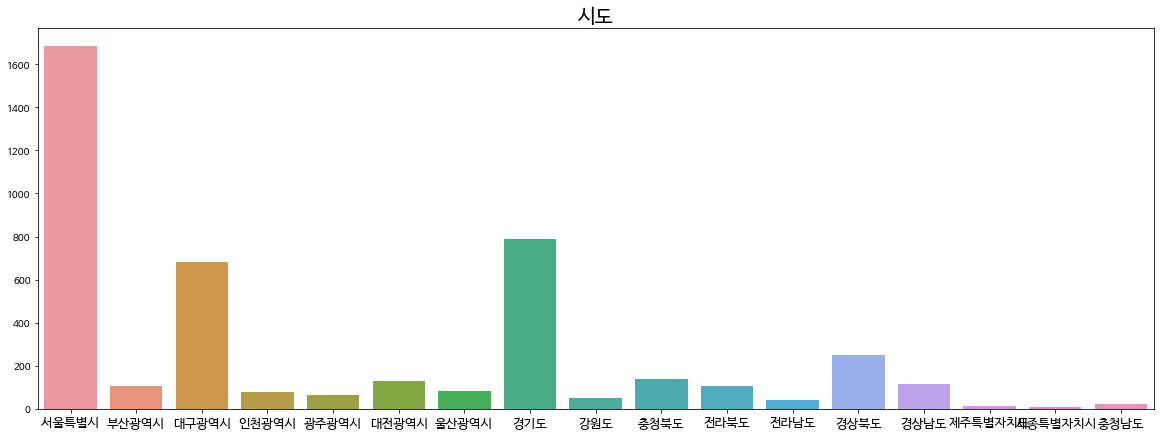

In [73]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)

sns.countplot(bike['시도'])
plt.title('시도',size=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(size=13)
plt.show()


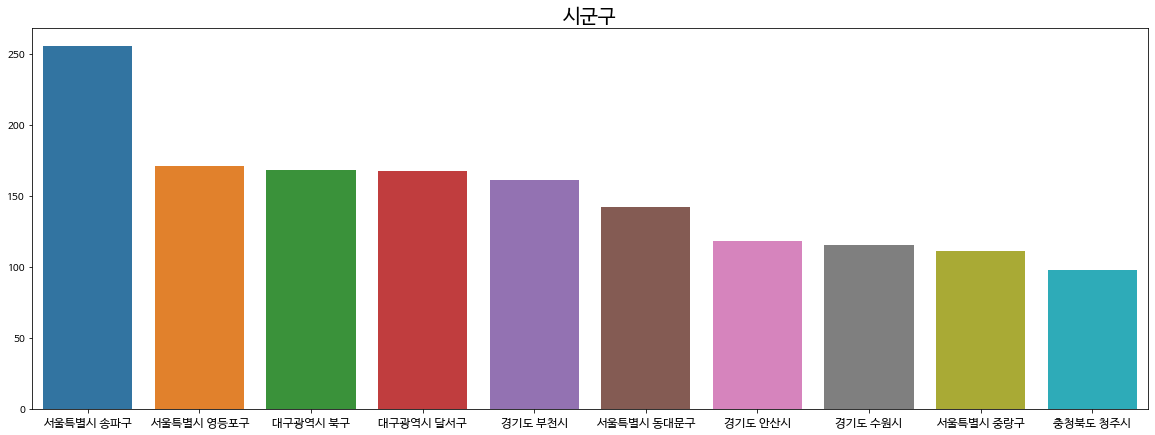

In [72]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)

sns.barplot(x = bike['시군구'].value_counts().index[:10], y=bike['시군구'].value_counts()[:10])
plt.title('시군구',size=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(size=12)
plt.show()


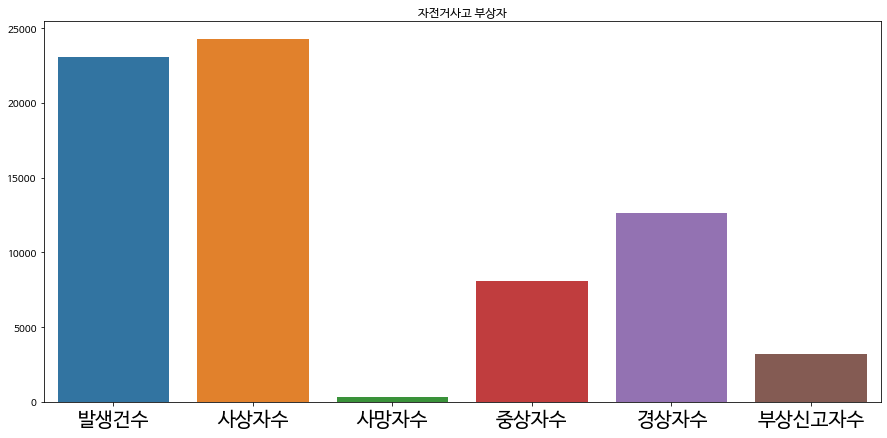

In [70]:
# 발생건수, 사상자수, 사망자수, 중상자수, 경상자수, 부사

plt.figure(figsize=(15,7))

count_list = []
for i in range(6):
  count_list.append(bike.iloc[:,1+i].sum())

sns.barplot(x = bike.columns[1:7], y = count_list)
plt.title('자전거사고 부상자')
plt.xticks(size=20)
plt.show()

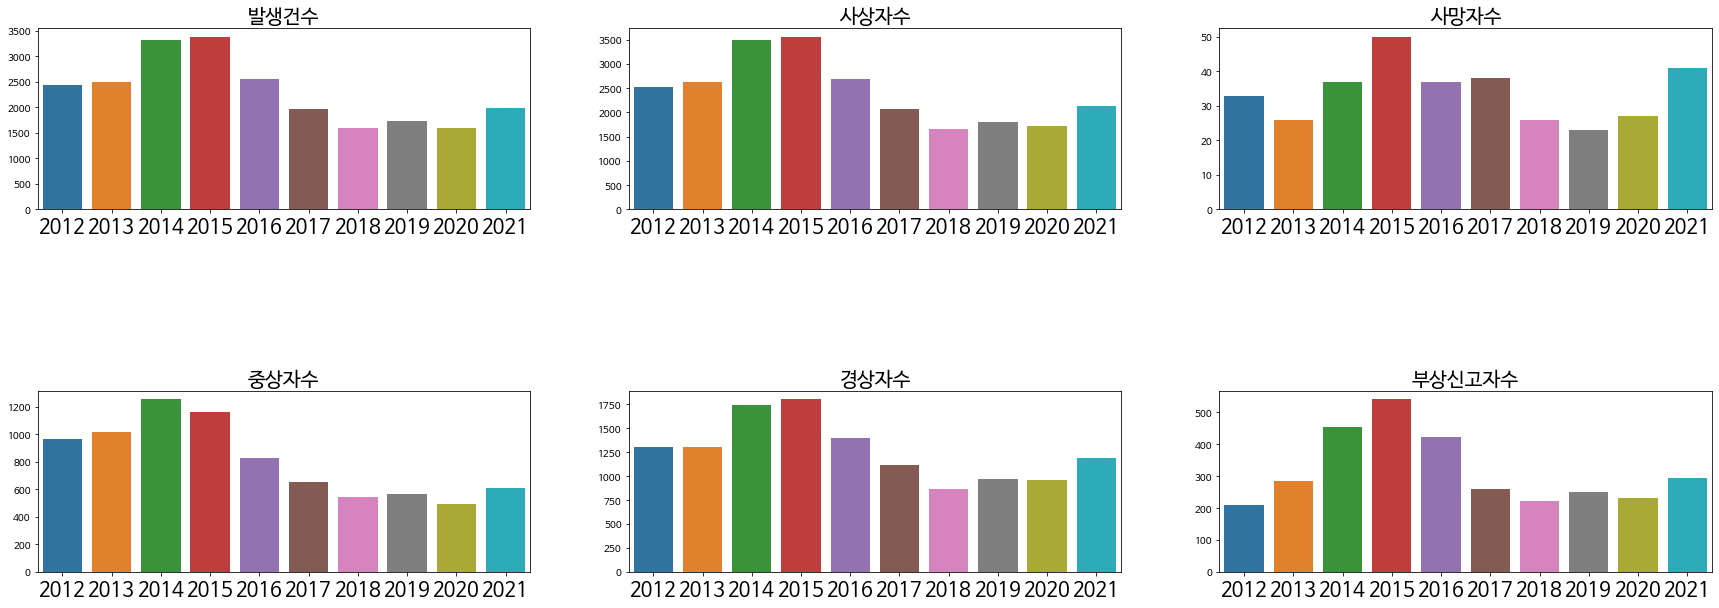

In [82]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = bike.groupby('년도').sum()

for i in range(6):
  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index, y= year_df.iloc[:,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(size=20)
plt.show()

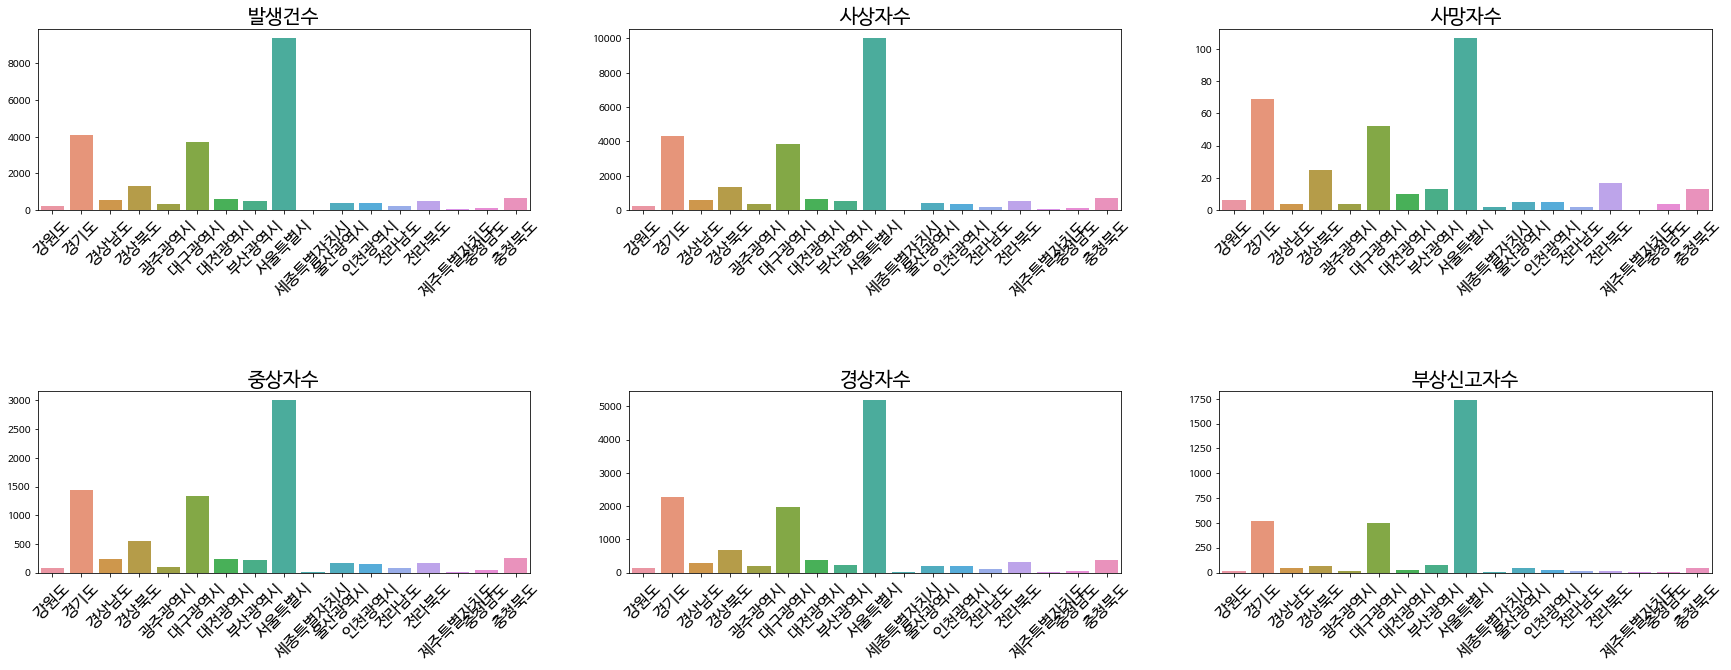

In [86]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = bike.groupby('시도').sum()


for i in range(6):
  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index, y= year_df.iloc[:,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(rotation=45,size=16)
plt.show()

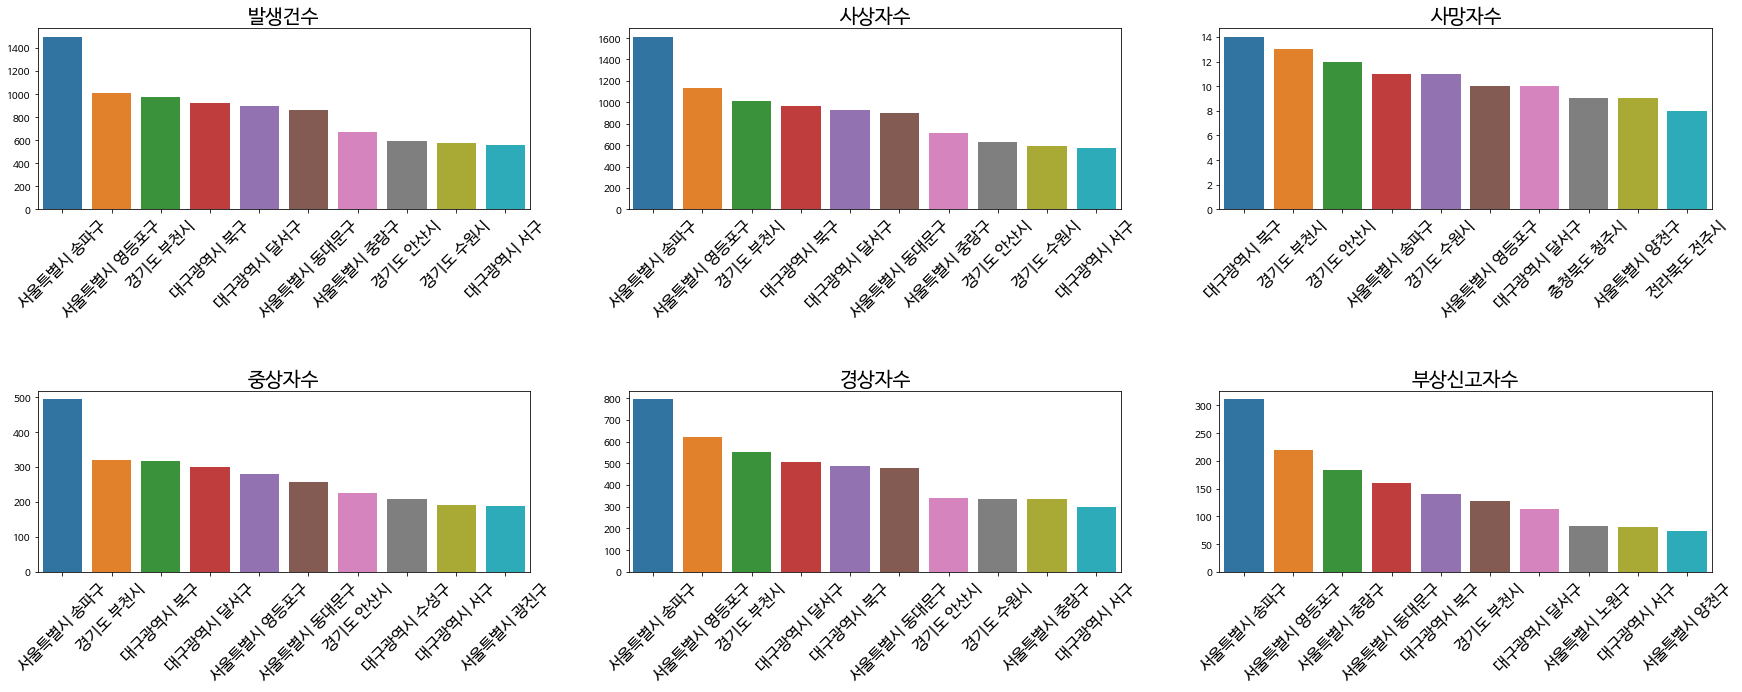

In [92]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = bike.groupby('시군구').sum()

for i in range(6):
  year_df = year_df.sort_values(year_df.columns[i])[::-1]

  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index[:10], y= year_df.iloc[:10,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(rotation=45,size=16)
plt.show()

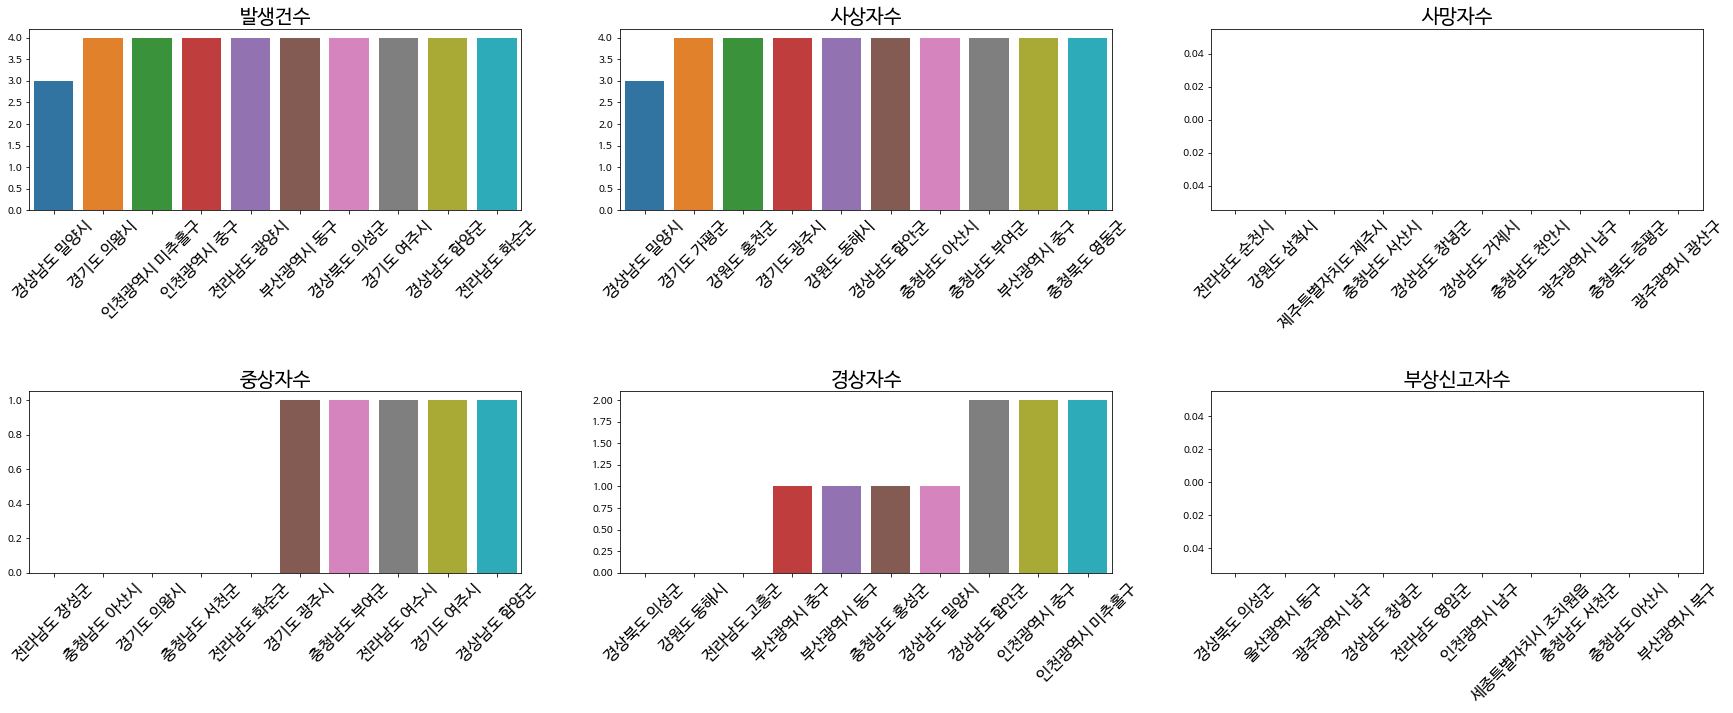

In [93]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = bike.groupby('시군구').sum()

for i in range(6):
  year_df = year_df.sort_values(year_df.columns[i])

  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index[:10], y= year_df.iloc[:10,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(rotation=45,size=16)
plt.show()

In [105]:
bike.sort_values('발생건수')[::-1]

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,년도,시도,시군구,동
1545,서울특별시 동대문구 용두동(마장동사거리 부근),17,18,0,4,10,4,127.04,37.57,2015,서울특별시,서울특별시 동대문구,용두동
1112,서울특별시 송파구 잠실동(올림픽대로-백제고분로램프(3) 부근),16,18,0,8,5,5,127.08,37.52,2014,서울특별시,서울특별시 송파구,잠실동
229,대구광역시 서구 비산동(북비산네거리 부근),16,16,0,7,9,0,128.57,35.88,2012,대구광역시,대구광역시 서구,비산동
2178,서울특별시 도봉구 방학동(도봉소방서 부근),15,16,0,7,5,4,127.04,37.67,2016,서울특별시,서울특별시 도봉구,방학동
1658,서울특별시 영등포구 여의도동(서울방송(SBS) 부근),13,15,0,4,10,1,126.93,37.53,2015,서울특별시,서울특별시 영등포구,여의도동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,전라북도 정읍시 연지동(구미동사거리 부근),3,3,1,1,1,0,126.85,35.57,2020,전라북도,전라북도 정읍시,연지동
3356,서울특별시 강북구 번동(금보빌딩 부근),3,3,1,0,2,0,127.03,37.63,2019,서울특별시,서울특별시 강북구,번동
4046,서울특별시 양천구 신월동(선창빌딩앞 부근),3,3,1,0,2,0,126.84,37.52,2021,서울특별시,서울특별시 양천구,신월동
4045,서울특별시 양천구 신월동(신월IC 부근),3,3,1,2,0,0,126.83,37.53,2021,서울특별시,서울특별시 양천구,신월동


In [111]:
plot_df = bike[bike['시도'] == '서울특별시'].sort_values('발생건수')[::-1][:100]
plot_df

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,년도,시도,시군구,동
1545,서울특별시 동대문구 용두동(마장동사거리 부근),17,18,0,4,10,4,127.04,37.57,2015,서울특별시,서울특별시 동대문구,용두동
1112,서울특별시 송파구 잠실동(올림픽대로-백제고분로램프(3) 부근),16,18,0,8,5,5,127.08,37.52,2014,서울특별시,서울특별시 송파구,잠실동
2178,서울특별시 도봉구 방학동(도봉소방서 부근),15,16,0,7,5,4,127.04,37.67,2016,서울특별시,서울특별시 도봉구,방학동
1659,서울특별시 영등포구 당산동(당산지하차도(북측) 부근),13,16,0,3,8,5,126.90,37.54,2015,서울특별시,서울특별시 영등포구,당산동
1029,서울특별시 양천구 목동(오목교(서단) 부근),13,13,0,4,5,4,126.88,37.52,2014,서울특별시,서울특별시 양천구,목동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,서울특별시 송파구 삼전동(삼전사거리 부근),9,10,0,2,3,5,127.09,37.50,2019,서울특별시,서울특별시 송파구,삼전동
3422,서울특별시 송파구 삼전동(배명로터리 부근),9,9,0,2,4,3,127.10,37.50,2019,서울특별시,서울특별시 송파구,삼전동
4093,서울특별시 송파구 거여동(거여동사거리 부근),9,11,0,2,6,3,127.14,37.50,2021,서울특별시,서울특별시 송파구,거여동
1052,서울특별시 구로구 구로동(구로이화우성아파트_구로큰길_진 부근),9,11,0,3,7,1,126.89,37.49,2014,서울특별시,서울특별시 구로구,구로동


In [118]:
import folium as g

color_list = ['red','blue','green','orange','drakred','lightred','']
plot_df = bike[bike['시도'] == '서울특별시'].sort_values('발생건수')[::-1][:100]

center_longitude, center_latitude = plot_df['위도'].mean(), plot_df['경도'].mean()

g_map = g.Map(location=[center_longitude,center_latitude],
              tiles='Stamen Terrain',
              zoom_start=12)

for num, (lon, lat) in enumerate(zip(plot_df['위도'],plot_df['경도'])):
  if num < 11:
    marker = g.Marker([lon,lat],
                      icon= g.Icon(color='red')).add_to(g_map)
  else:
    marker = g.Marker([lon,lat],
                      icon= g.Icon(color='blue')).add_to(g_map)

In [119]:
g_map